# Exercise 2.1: algorithm runtimes.
The dataset stored in runtimes.csv contains information on the runtime of two algorithms (a serial version and a distributed version) on test problems of dierent size (measured in pixels), and for various numbers of worker threads (for the distributed version).


### 1. Create a chart that examines how fast runtime increases with problem size, for the single and distributed versions, and for different numbers of threads for the latter.


In [368]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import random

In [369]:
#loading the dataset

df = pd.read_csv('runtimes.csv', comment = "#")

print(df.head())


   size  workers      time         algo
0  4096        1  3.736606  distributed
1  4096        2  2.133074  distributed
2  4096        3  1.673441  distributed
3  4096        4  1.515788  distributed
4  4096        5  1.475265  distributed


In [370]:
#checking for null values
df.isnull().sum()

size       0
workers    0
time       0
algo       0
dtype: int64

In [371]:
#filter data for single and distributed algorithm

df_single = df[df['algo'] == 'single']
df_distributed = df[df['algo'] == 'distributed']


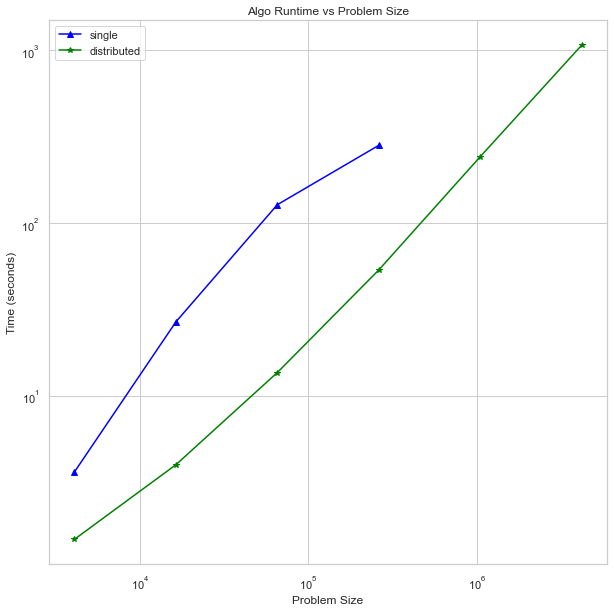

In [372]:
#Create a chart that examines how fast runtime increases with problem size, for the single and distributed versions
fig, ax1 = plt.subplots(figsize=(10, 10))

colors = ['blue', 'green']  
markers = ['^','*']

# Plot for Single-threaded runtime vs Problem Size
for algo_type, color, marker in zip(['single', 'distributed'], colors, markers):
    subset = df[df['algo'] == algo_type]
    
    # Use minimum runtime for each size if multiple entries per size and algo
    subset = subset.groupby(['size', 'algo'])['time'].min().reset_index()
    ax1.plot(subset['size'], subset['time'], marker=marker, linestyle='-', color=color, label=algo_type)

ax1.set_title('Algo Runtime vs Problem Size')
ax1.set_xlabel('Problem Size')
ax1.set_ylabel('Time (seconds)')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True)


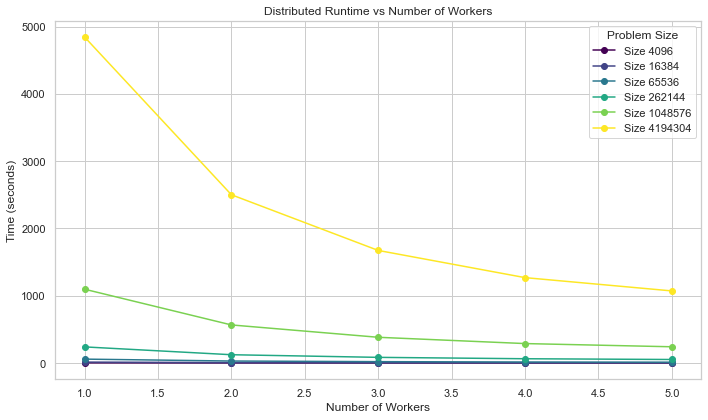

In [373]:
fig, ax2 = plt.subplots(figsize=(10, 6))

#Different colors for each problem size using a colormap
problem_sizes = df_distributed['size'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(problem_sizes)))


# Plot distributed runtime by number of workers for each problem size
for size, color in zip(sorted(problem_sizes), colors):
    subset = df_distributed[df_distributed['size'] == size]
    ax2.plot(subset['workers'], subset['time'], 'o-', label=f'Size {size}', color=color)

ax2.set_title('Distributed Runtime vs Number of Workers')
ax2.set_xlabel('Number of Workers')
ax2.set_ylabel('Time (seconds)')
ax2.legend(title='Problem Size')
ax2.grid(True)

plt.tight_layout()
plt.show()

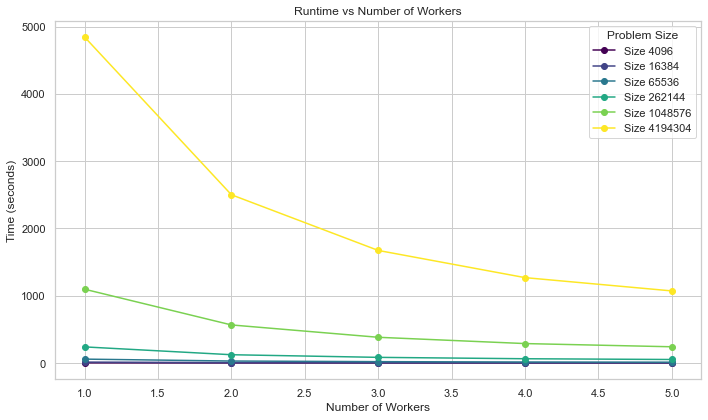

In [374]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique problem sizes
problem_sizes = df_distributed['size'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(problem_sizes)))  # Color map for visibility

for size, color in zip(sorted(problem_sizes), colors):
    subset = df_distributed[df_distributed['size'] == size]
    # Plot actual data
    ax.plot(subset['workers'], subset['time'], 'o-', label=f'Size {size}', color=color)

ax.set_title('Runtime vs Number of Workers')
ax.set_xlabel('Number of Workers')
ax.set_ylabel('Time (seconds)')
ax.legend(title = "Problem Size")
ax.grid(True)

plt.tight_layout()
plt.show()


# Exercise 2.2: precipitation data.
In this exercise we process precipitation data of the Deutscher Wetterdienst (DWD). The original data is available at https://www.dwd.de/DE/leistungen/cdc/cdc_ueberblick-klimadate n.html, but all data required for the exercise is already provided in the zip file of the problem sheet.


### 1. The file zehn_min_rr_Beschreibung_Stationen.txt (as available on the DWD website) contains basic information about the weather measurement stations. Its format should be self-explanatory. Convert it into reasonable CSV format. As a warmup, create a scatter plot of the geographical position of all weather stations and their elevation.


In [375]:
# Open the text file and read its contents
with open('zehn_min_rr_Beschreibung_Stationen.txt', 'r', encoding = 'latin-1') as file:
    lines = file.readlines()
    print(lines)


['Stations_id von_datum bis_datum Stationshoehe geoBreite geoLaenge Stationsname Bundesland\n', '----------- --------- --------- ------------- --------- --------- ----------------------------------------- ----------\n', '00020 20040812 20240422            432     48.9219    9.9129 Abtsgmünd-Untergröningen                                                         Baden-Württemberg                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [376]:

# Extracting column headers from the first line
headers = lines[0].split()


data = []
for line in lines[2:]:
    parts = line.split(maxsplit = len(headers)-1)
    print(parts)
    data.append(parts)

# Writing the extracted data into a CSV file
with open('zehn_min_rr_Beschreibung_Stationen.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(headers)
    writer.writerows(data)

['00020', '20040812', '20240422', '432', '48.9219', '9.9129', 'Abtsgmünd-Untergröningen', 'Baden-Württemberg                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         \n']
['00044', '20070208', '20240422', '44', '52.93

In [377]:
#reading csv_file 
df = pd.read_csv('zehn_min_rr_Beschreibung_Stationen.csv')
print(df.head())
print("\nNo. of rows in the dataset:", df.shape[0])

   Stations_id  von_datum  bis_datum  Stationshoehe  geoBreite  geoLaenge  \
0           20   20040812   20240422            432    48.9219     9.9129   
1           44   20070208   20240422             44    52.9336     8.2370   
2           53   20050831   20240422             60    52.5850    13.5634   
3           73   20070213   20240422            374    48.6183    13.0620   
4           78   20041010   20240422             64    52.4853     7.9125   

               Stationsname                                         Bundesland  
0  Abtsgmünd-Untergröningen  Baden-Württemberg                             ...  
1              Großenkneten  Niedersachsen                                 ...  
2               Ahrensfelde  Brandenburg                                   ...  
3     Aldersbach-Kramersepp  Bayern                                        ...  
4                 Alfhausen  Niedersachsen                                 ...  

No. of rows in the dataset: 1068


In [378]:
print(df['Stationsname'].nunique())

1056


/var/folders/xn/gbft823x5mx4sjzwb1jd4c440000gn/T/ipykernel_1326/871495740.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = 'Elevation')


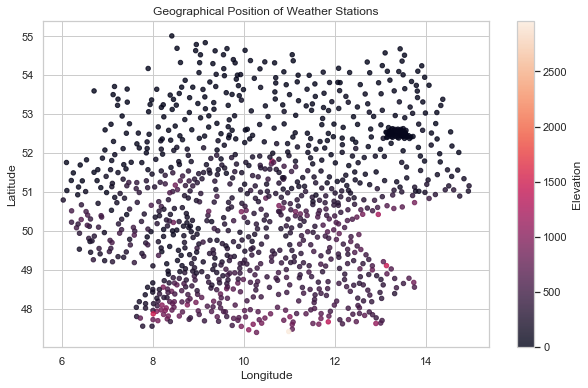

In [379]:

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['geoLaenge'], df['geoBreite'], c = df['Stationshoehe'], s = 20, alpha = 0.8)
plt.colorbar(label = 'Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Position of Weather Stations')
plt.grid(True)
plt.show()


### 2. The file 10min_processed.csv contains condensed precipitation data for the day 2024- 04-20 in intervals of 10 minutes for (a subset of) the weather stations listed above. The column stationid corresponds to the column Stations_id in the other table. The column date indicates the beginning of the 10 minute interval in the format YYYYMMDDHHMM. The column rain encodes precipitation in this interval in millimeters, missing values are encoded as -999.

In [380]:
#loading 10min_processed.csv file

min_Processed = pd.read_csv('10min_processed.csv')

In [381]:
print(min_Processed.head())
print("\n No. of rows in the dataset: ",min_Processed.shape[0])

   stationid          date  rain
0       6303  202404200000   0.0
1       6303  202404200010   0.0
2       6303  202404200020   0.0
3       6303  202404200030   0.0
4       6303  202404200040   0.0

 No. of rows in the dataset:  150991


In [382]:
print(min_Processed.head())
print("\n No. of rows in the dataset: ",min_Processed.shape[0])

   stationid          date  rain
0       6303  202404200000   0.0
1       6303  202404200010   0.0
2       6303  202404200020   0.0
3       6303  202404200030   0.0
4       6303  202404200040   0.0

 No. of rows in the dataset:  150991


In [383]:
#since we have encoded missing values as -999, we see how many '999' are there
def count_missing(df):
    return (df['rain'] == -999).sum()

print(f'Before Removing Null Values: {count_missing(min_Processed)}')

# we can remove the rows with -999 values in 'rain' column
min_Processed.drop(min_Processed[min_Processed['rain'] == -999].index, inplace = True)

print(f'After Removing Null Values: {count_missing(min_Processed)}')

Before Removing Null Values: 346
After Removing Null Values: 0


In [384]:
# Now we can joing min_Processed_df and df based on matching stationid

df_min_Processed = pd.merge(min_Processed, df[['Stations_id', 'Stationsname']], how='left', left_on='stationid', right_on='Stations_id')


In [385]:
print(df_min_Processed.head())
print("\n No. of rows in the dataset: ",df_min_Processed.shape[0])

   stationid          date  rain  Stations_id             Stationsname
0       6303  202404200000   0.0         6303  Willingen/Hochsauerland
1       6303  202404200010   0.0         6303  Willingen/Hochsauerland
2       6303  202404200020   0.0         6303  Willingen/Hochsauerland
3       6303  202404200030   0.0         6303  Willingen/Hochsauerland
4       6303  202404200040   0.0         6303  Willingen/Hochsauerland

 No. of rows in the dataset:  150645


In [386]:
#drop the redundant Stations_id column

df_min_Processed.drop(columns = 'Stations_id', inplace = True)

df_min_Processed.head()

,stationid,date,rain,Stationsname
0,6303,202404200000,0.0,Willingen/Hochsauerland
1,6303,202404200010,0.0,Willingen/Hochsauerland
2,6303,202404200020,0.0,Willingen/Hochsauerland
3,6303,202404200030,0.0,Willingen/Hochsauerland
4,6303,202404200040,0.0,Willingen/Hochsauerland


In [387]:
#rearrage the columns
desired_columns_order = ['stationid', 'Stationsname', 'date', 'rain']

df_min_Processed = df_min_Processed[desired_columns_order]

df_min_Processed.head(100)

,stationid,Stationsname,date,rain
0,6303,Willingen/Hochsauerland,202404200000,0.00
1,6303,Willingen/Hochsauerland,202404200010,0.00
2,6303,Willingen/Hochsauerland,202404200020,0.00
3,6303,Willingen/Hochsauerland,202404200030,0.00
4,6303,Willingen/Hochsauerland,202404200040,0.00
...,...,...,...,...
95,6303,Willingen/Hochsauerland,202404201550,0.67
96,6303,Willingen/Hochsauerland,202404201600,0.30
97,6303,Willingen/Hochsauerland,202404201610,0.44
98,6303,Willingen/Hochsauerland,202404201620,0.01


In [388]:
#convert the date column to datetime format
df_min_Processed['date'] = pd.to_datetime(min_Processed['date'], format='%Y%m%d%H%M').dt.strftime('%Y.%m.%d.%H.%M')


# Extract the hour part of the 'date' column
df_min_Processed['hour'] = pd.to_datetime(df_min_Processed['date'], format='%Y.%m.%d.%H.%M').dt.hour

print(df_min_Processed.head())

   stationid             Stationsname              date  rain  hour
0       6303  Willingen/Hochsauerland  2024.04.20.00.00   0.0   0.0
1       6303  Willingen/Hochsauerland  2024.04.20.00.10   0.0   0.0
2       6303  Willingen/Hochsauerland  2024.04.20.00.20   0.0   0.0
3       6303  Willingen/Hochsauerland  2024.04.20.00.30   0.0   0.0
4       6303  Willingen/Hochsauerland  2024.04.20.00.40   0.0   0.0


In [389]:
#group by 'StationName' and 'Hour'
df_min_Processed_groupedBy_Station = df_min_Processed.groupby(['stationid', 'hour'])['rain'].sum().reset_index()
df_min_Processed_groupedBy_Station.shape[0]

25055

In [390]:
#Compute the total precipitation at each weather station within each hour of the observed day
random_row = df_min_Processed_groupedBy_Station.sample(n = 20)
print(random_row)

       stationid  hour  rain
740          222  20.0  1.97
3684        1046  12.0  0.12
14429       4405   8.0  0.00
9474        2992  23.0  0.00
10508       3263   1.0  0.00
15764       4878  23.0  0.00
8230        2618   3.0  0.00
18399       5721  16.0  0.13
13764       4224  15.0  0.12
11736       3607   5.0  0.01
2649         801   9.0  0.00
3106         896  10.0  0.00
24729      17491  13.0  0.00
11090       3418   7.0  0.00
22081       7428   2.0  0.00
13993       4300   4.0  0.00
15148       4625   7.0  0.00
21463       7368   8.0  0.00
23103      15000  19.0  0.05
10387       3234   0.0  0.00


[17.0, 12.0, 4.0, 5.0]


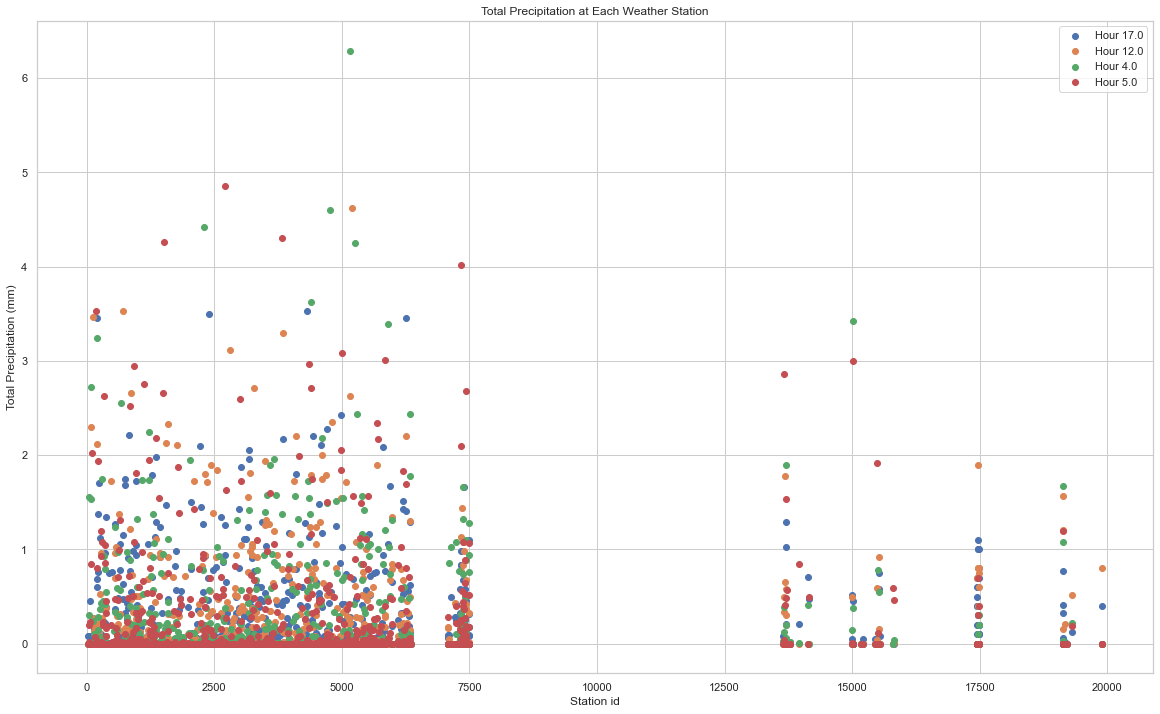

In [396]:
#For one (or multiple) hours, show the precipitation of all weather stations in a scatter plot.

unique_hours = df_min_Processed_groupedBy_Station['hour'].unique()

specified_hours = random.sample(list(unique_hours), 4)
print(specified_hours)

plt.figure(figsize= (20,12))
for hour in specified_hours:
    hour_data = df_min_Processed_groupedBy_Station[df_min_Processed_groupedBy_Station['hour'] == hour]
    plt.scatter(hour_data['stationid'], hour_data['rain'], label=f'Hour {hour}')
    
plt.xlabel('Station id')
plt.ylabel('Total Precipitation (mm)')
plt.title('Total Precipitation at Each Weather Station')
plt.legend()
plt.show()

In [400]:
print(df_min_Processed_groupedBy_Station[df_min_Processed_groupedBy_Station['stationid'] == 10000])

Empty DataFrame
Columns: [stationid, hour, rain]
Index: []
